Threads: 1. Performance time: 0:00:05.269615
Threads: 2. Performance time: 0:00:03.690932
Threads: 3. Performance time: 0:00:03.691129
Threads: 4. Performance time: 0:00:04.662224
Threads: 5. Performance time: 0:00:03.499942
Threads: 6. Performance time: 0:00:03.499150
Threads: 7. Performance time: 0:00:04.638295
Threads: 8. Performance time: 0:00:03.632647


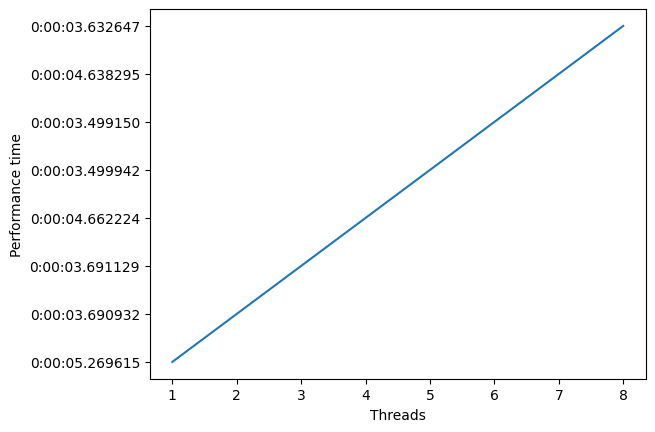

In [10]:
import numpy as np
from numba import njit, prange, config, threading_layer
from multiprocessing import cpu_count
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

# установка OpenMP в качестве backend для threading_layer
config.THREADING_LAYER = 'omp'


threads = [1, 2, 3, 4, 5, 6, 7, 8]

performance_result = {}


# объявление функции для перемножения матриц
@njit(parallel=True)
def matrix_multiply(a, b, c):
    # получение размеров матриц
    n = a.shape[0]
    m = a.shape[1]
    k = b.shape[1]

    # перемножение матриц
    for i in prange(n):
        for j in prange(k):
            c[i, j] = 0
            for l in range(m):
                c[i, j] += a[i, l] * b[l, j]

# создание матриц
basic_size = 1024#4096

a = np.random.rand(basic_size, basic_size)
b = np.random.rand(basic_size, basic_size)
c = np.zeros((basic_size, basic_size))


for thread in threads:
  # Включаю таймер
  start_time = datetime.now()
  # установка количества потоков
  config.NUMBA_NUM_THREADS = thread
  # перемножение матриц
  matrix_multiply(a, b, c)
  # Выключаю таймер
  execution_time = datetime.now() - start_time
  performance_result[thread] = str(execution_time)
  print("Threads: "+str(thread)+". Performance time: "+str(execution_time))

